In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from copy import copy, deepcopy

def limites (n, minn = 0, maxn = 255): #coloca range de números entre 0 e 255
    return max(min(maxn, n), minn)

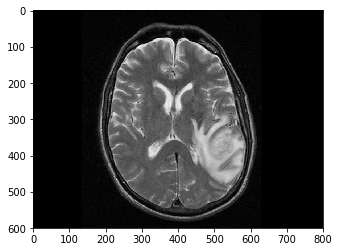

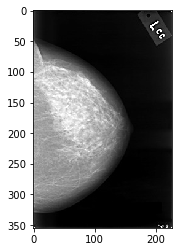

In [2]:
brain = cv2.imread("brain.jpg",0)
mama = cv2.imread("mama_norm.jpg",0)
plt.figure()
plt.imshow(brain,cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(mama,cmap='gray', vmin=0, vmax=255)
plt.show()


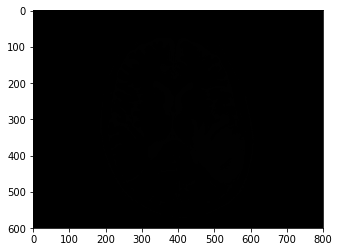

In [3]:
#binario
limiar = 127
brain_binario = np.zeros((brain.shape[0],brain.shape[1]),dtype=int)
for l in range(brain.shape[0]):
    for c in range(brain.shape[1]):
        if brain[l][c] > 127:
            brain_binario[l][c] = 1
        else:
            brain_binario[l][c] = 0

plt.figure()
plt.imshow(brain_binario,cmap='gray', vmin=0, vmax=255)
plt.show()

Valor max: 254 Valor min: 0


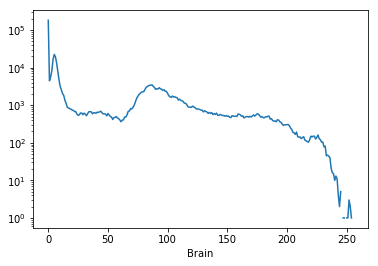

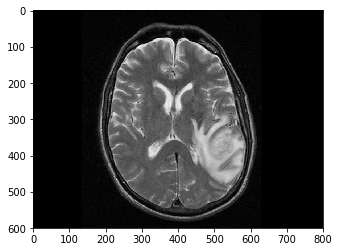

In [4]:
#histograma
brain_hist = np.zeros(256,dtype=int)
brain_max = 0
brain_min = 255
for l in range(brain.shape[0]):
    for c in range(brain.shape[1]):
        brain_hist[brain[l][c]]+=1
        if brain[l][c] > brain_max:
            brain_max = brain[l][c]
        if brain[l][c] < brain_min:
            brain_min = brain[l][c]
            
#print(brain_hist)
print('Valor max: '+str(brain_max)+' Valor min: '+str(brain_min))
plt.plot(brain_hist)
plt.xlabel("Brain")
plt.yscale('log')
plt.show()

plt.figure()
plt.imshow(brain,cmap='gray', vmin=0, vmax=255)
plt.show()

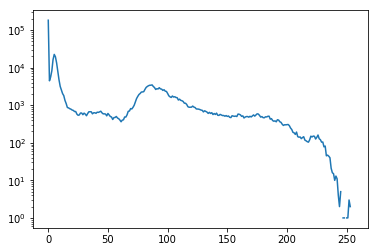

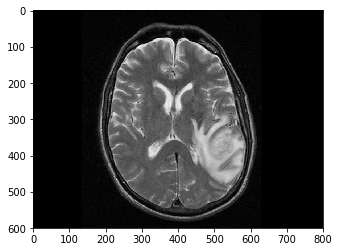

In [5]:
#linear
g_max = 255.0
g_min = 0.0
g_delta = g_max - g_min
f_delta = brain_max - brain_min

brain_linear = np.zeros((brain.shape[0],brain.shape[1]),dtype=int)
brain_linear_hist = np.zeros(256,dtype=int)
for l in range(brain.shape[0]):
    for c in range(brain.shape[1]):
        brain_linear[l][c] = (g_delta/f_delta)*(brain[l][c] - brain_min) + g_min
        brain_linear_hist[brain_linear[l][c]]+=1
        
plt.figure()
plt.plot(brain_linear_hist)
plt.yscale('log')
plt.show()
        
plt.figure()
plt.imshow(brain_linear,cmap='gray', vmin=0, vmax=255)
plt.show()


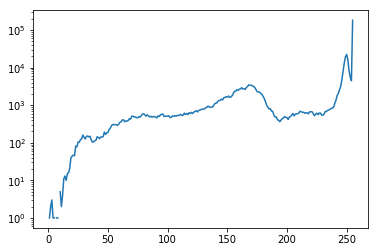

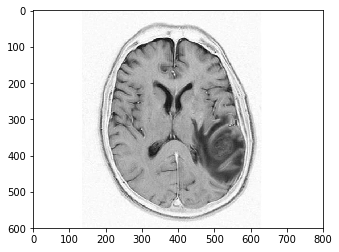

In [6]:
#negativo
brain_negativo = np.zeros((brain.shape[0],brain.shape[1]),dtype=int)
brain_negativo = 255 - brain
brain_negativo_hist = np.zeros(256,dtype=int)

for l in range(brain.shape[0]):
    for c in range(brain.shape[1]):
        brain_negativo_hist[brain_negativo[l][c]]+=1

plt.figure()
plt.plot(brain_negativo_hist)
plt.yscale('log')
plt.show()

plt.figure()
plt.imshow(brain_negativo,cmap='gray', vmin=0, vmax=255)
plt.show()

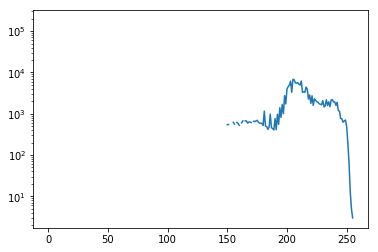

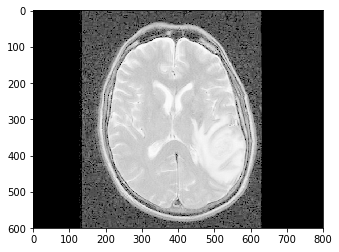

In [7]:
#logaritmo
brain_log = np.zeros((brain.shape[0],brain.shape[1]),dtype=int)
brain_log_hist = np.zeros(256,dtype=int)

a = 255/ np.log(1 + brain_max)

brain_log = a*np.log(brain + 1)

brain_log = np.asarray(brain_log).astype(int)

for l in range(brain.shape[0]):
    for c in range(brain.shape[1]):
        brain_log_hist[brain_log[l][c]]+=1

plt.figure()
plt.plot(brain_log_hist)
plt.yscale('log')
plt.show()

plt.figure()
plt.imshow(brain_log,cmap='gray', vmin=0, vmax=255)
plt.show()

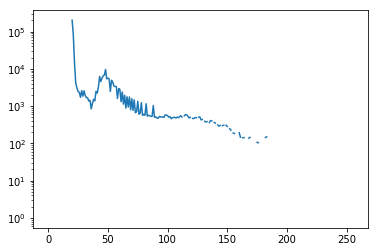

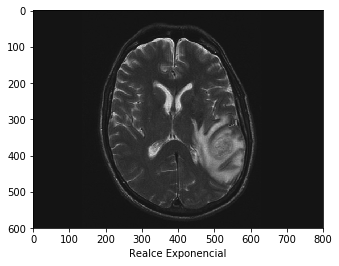

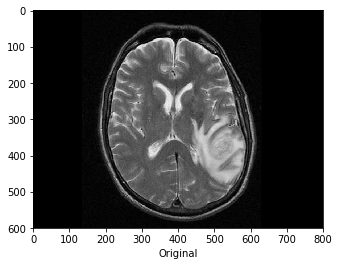

In [8]:
#exponencial
brain_exp = np.zeros((brain.shape[0],brain.shape[1]),dtype=int)
brain_exp_hist = np.zeros(256,dtype=int)

#função exponencial c*b^f(i,j)
c1= 20.2
b = 1.01

#aplicando a função em cada pixel e convertando para inteiro no range de 0 a 255
for l in range(brain.shape[0]):
    for c in range(brain.shape[1]):
        brain_exp[l][c] = limites(int(c1*(b**(brain[l][c]))))

for l in range(brain.shape[0]):
    for c in range(brain.shape[1]):
        brain_exp_hist[brain_exp[l][c]]+=1

plt.figure()
plt.plot(brain_exp_hist)
plt.yscale('log')
plt.show()

plt.figure()
plt.imshow(brain_exp,cmap='gray', vmin=0, vmax=255)
plt.xlabel('Realce Exponencial')
plt.show()

plt.figure()
plt.imshow(brain,cmap='gray', vmin=0, vmax=255)
plt.xlabel('Original')
plt.show()


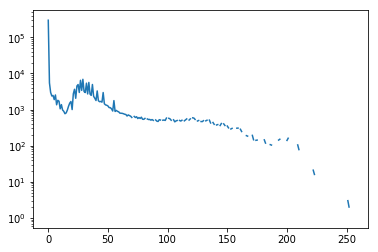

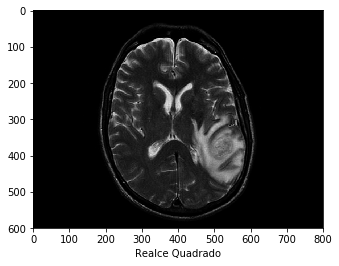

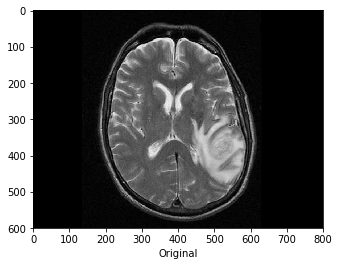

In [9]:
#função quadrada
brain_quad = np.zeros((brain.shape[0],brain.shape[1]),dtype=int)
brain_quad_hist = np.zeros(256,dtype=int)

#função quadrada a*f(i,j)²
a = 255.0/(brain_max**2)

#aplicando a função em cada pixel e convertando para inteiro no range de 0 a 255
for l in range(brain.shape[0]):
    for c in range(brain.shape[1]):
        brain_quad[l][c] = limites(int(a*(brain[l][c]**2)))

for l in range(brain.shape[0]):
    for c in range(brain.shape[1]):
        brain_quad_hist[brain_quad[l][c]]+=1

plt.figure()
plt.plot(brain_quad_hist)
plt.yscale('log')
plt.show()

plt.figure()
plt.imshow(brain_quad,cmap='gray', vmin=0, vmax=255)
plt.xlabel('Realce Quadrado')
plt.show()

plt.figure()
plt.imshow(brain,cmap='gray', vmin=0, vmax=255)
plt.xlabel('Original')
plt.show()

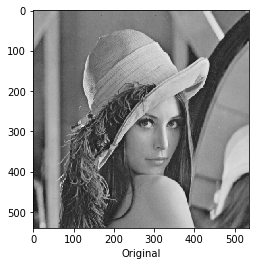

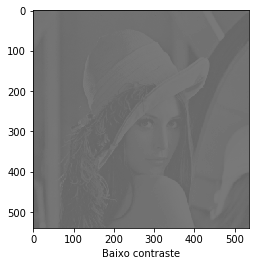

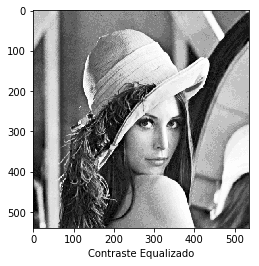

In [10]:
#Equalização de Histograma
lena = cv2.imread("lena.jpg",0)
lena_baixo_contraste = cv2.imread("lena.jpg",0)
lena_baixo_contraste = lena_baixo_contraste // 10
lena_baixo_contraste += 100

lena_bc_hist = np.zeros(256,dtype=int)
lena_bc_hist_norm = np.zeros(256,dtype=float)

for l in range(lena.shape[0]):
    for c in range(lena.shape[1]):
        lena_bc_hist[lena_baixo_contraste[l][c]]+=1

#PMF
tot_pixels = lena.shape[0]*lena.shape[1]
for i in range(lena_bc_hist_norm.size):
    lena_bc_hist_norm[i] = float(lena_bc_hist[i])/tot_pixels

#CDF
lena_bc_hist_norm_acumulado = lena_bc_hist_norm[:]
for i in range(1,lena_bc_hist_norm_acumulado.size):
    lena_bc_hist_norm_acumulado[i] += lena_bc_hist_norm_acumulado[i-1]

#norm
lena_bc_hist_equalizado = lena_bc_hist_norm_acumulado[:]
for i in range(lena_bc_hist_equalizado.size):
    lena_bc_hist_equalizado[i] =  lena_bc_hist_equalizado[i] * 255

#formando nova imagem
lena_equalizada = deepcopy(lena_baixo_contraste)
for l in range(lena.shape[0]):
    for c in range(lena.shape[1]):
        lena_equalizada[l][c] = lena_bc_hist_equalizado[lena_equalizada[l][c]]

plt.figure()
plt.imshow(lena,cmap='gray', vmin=0, vmax=255)
plt.xlabel('Original')
plt.show()

plt.figure()
plt.imshow(lena_baixo_contraste,cmap='gray', vmin=0, vmax=255)
plt.xlabel('Baixo contraste')
plt.show()

plt.figure()
plt.imshow(lena_equalizada,cmap='gray', vmin=0, vmax=255)
plt.xlabel('Contraste Equalizado')
plt.show()